# Feature Selection

In [5]:
# import the needed libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [6]:
# loading the cleaned Data from 01_data_preprocessing
X = pd.read_csv('../data/cleaned_X.csv')
y = pd.read_csv('../data/clean_y.csv')

In [7]:


# Split the dataset to train and test datasets
# Test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scalling X 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Feature Importances using Random Forest 

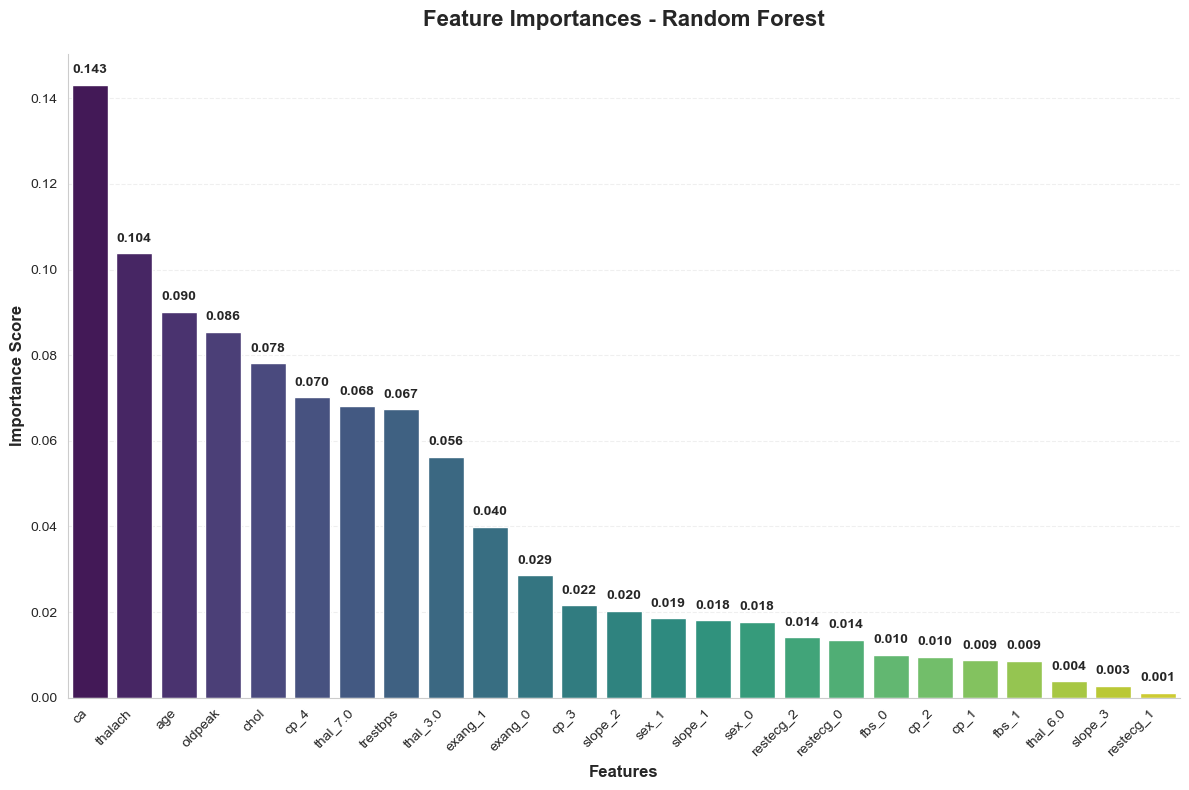

Top 5 Features for Random Forest Model: 
   feature  importance
5       ca    0.143174
3  thalach    0.103819
0      age    0.090068
4  oldpeak    0.085508
2     chol    0.078055 


In [10]:

from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest Model 
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train.values.ravel())


# Plot Features Importances  
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Get feature importances and create DataFrame for easier handling
importances_rf = rf_model.feature_importances_
feature_names = X.columns.tolist()

# Create a DataFrame and sort by importance (descending)
importance_rf = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_rf
}).sort_values('importance', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))

# Create vertical bar plot with seaborn color palette
ax = sns.barplot(data=importance_rf, x='feature', y='importance', 
                 palette='viridis', hue='feature', legend=False)

# Customize the plot
plt.title('Feature Importances - Random Forest', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Importance Score', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, (bar, importance) in enumerate(zip(ax.patches, importance_rf['importance'])):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
            f'{importance:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Customize grid
plt.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()


print(f'Top 5 Features for Random Forest Model: \n{importance_rf[:5]} ')

## Feature Importances using Gradien Boosting 

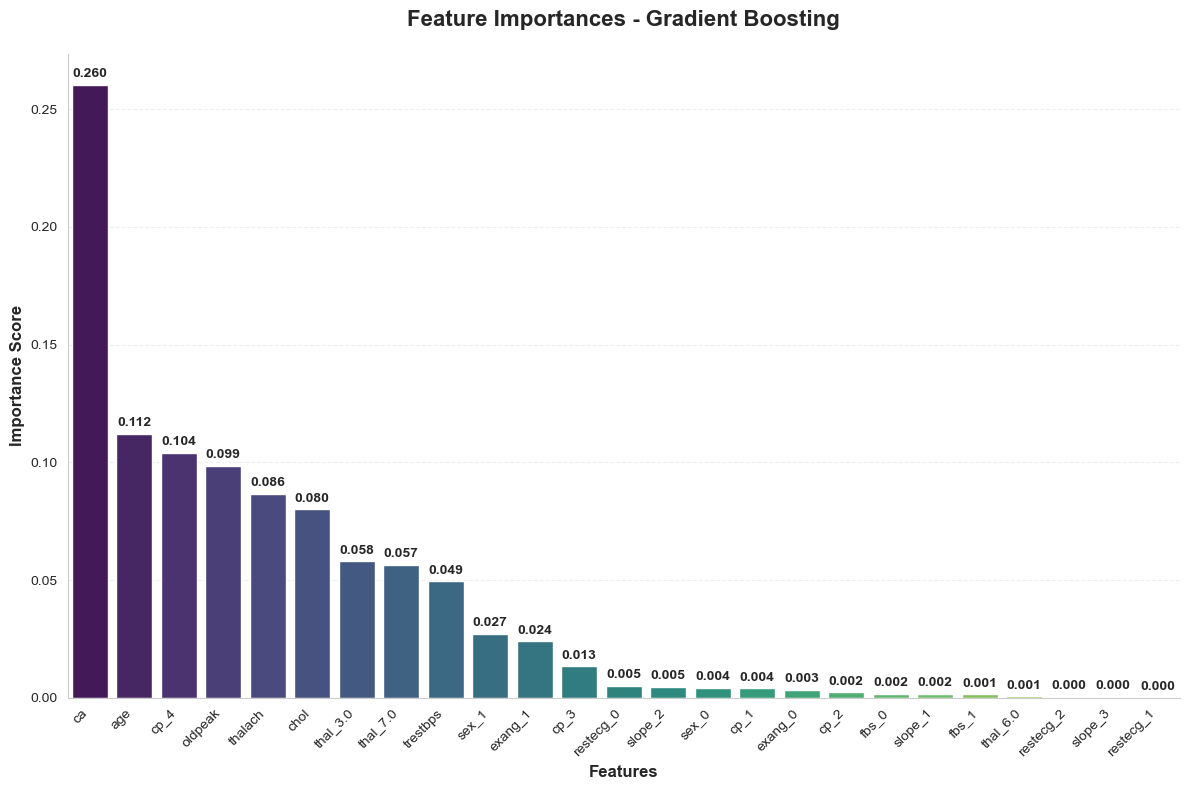

Top 5 Features for Gradient Boosting Model: 
   feature  importance
5       ca    0.143174
3  thalach    0.103819
0      age    0.090068
4  oldpeak    0.085508
2     chol    0.078055 


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train Gradien Boosting Model 
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train.values.ravel())

# Make Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Plot Features importances
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Get feature importances and create DataFrame for easier handling
importances_gb = gb_model.feature_importances_
feature_names = X.columns.tolist()

# Create a DataFrame and sort by importance (descending)
importance_gb = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_gb
}).sort_values('importance', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))

# Create vertical bar plot with seaborn color palette
ax = sns.barplot(data=importance_gb, x='feature', y='importance', 
                 palette='viridis', hue='feature', legend=False)

# Customize the plot
plt.title('Feature Importances - Gradient Boosting', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Importance Score', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, (bar, importance) in enumerate(zip(ax.patches, importance_gb['importance'])):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
            f'{importance:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Customize grid
plt.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()


print(f'Top 5 Features for Gradient Boosting Model: \n{importance_rf[:5]} ')

## Chi-Square Method 

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply Chi-square feature selection 
chi2_selector = SelectKBest(chi2, k='all')
X_new = chi2_selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = chi2_selector.scores_

# Create a DataFrame to view the feature scores 
features_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': feature_scores
})

# Sort features based on Chi-square score
feature_scores_df = features_scores_df.sort_values(by='Chi-Square Score', ascending=False)

feature_scores_df

,Feature,Chi-Square Score
3,thalach,187.053104
5,ca,82.730613
4,oldpeak,68.570533
24,thal_7.0,42.750381
11,cp_4,39.848093
22,thal_3.0,36.654197
21,exang_1,35.508090
0,age,22.917697
15,slope_1,22.888726
2,chol,20.855084


In [14]:
print(f'Top 5 Features for Random Forest Model: {feature_scores_df[:5]} ')

Top 5 Features for Random Forest Model:      Feature  Chi-Square Score
3    thalach        187.053104
5         ca         82.730613
4    oldpeak         68.570533
24  thal_7.0         42.750381
11      cp_4         39.848093 
